# Part 1: SLR

Consider a Simple Linear Regression model of the form:

$$
y = \alpha + \beta x + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\epsilon$ is the error term
- $\alpha$ and $\beta$ are parameters to be estimated

Using your brain and a pen, prove that :

$\hat{\beta} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

hint : start by $\hat{\alpha}$

# Part 2: MLR

Consider a Muliple Linear Regression model of the form:
$$
y = \beta X + \epsilon
$$

1. What is $\beta$ ?
2. What is $X$ ?
3. What are the dimensions of $X$ & $\beta$
4. Prove that $\hat{\beta} = (X^T X)^{-1} X^T y$
5. What are the dimensions of each element of $\hat{\beta}$
6. Under what conditions $X^T X$ is invertible ?

# Part 3 : Calculate Simple Linear Regression Coefficients


Given the following dataset:
   \( x \) | \( y \) |
 |---------|---------|
 | 1       | 3       |
 | 2       | 5       |
 | 3       | 4       |
 | 4       | 7       |
 | 5       | 6       |

1. Calculate the intercept and slope for a Simple Linear Regression model.
2. Draw the regression line on paper, and then plot it by coding. Compare
4. Calculate the residuals on paper and then by coding. Compare
5. Calculate the SSR on paper and then by coding. Compare
6. Calculate the R_squared on paper and then by coding. Analyse


##### R_squared (Coefficient of Determination)

$R^2$, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides insight into the goodness of fit of a model, indicating how well the independent variables explain the variability of the dependent variable.

The $R^2$ value ranges from 0 to 1, where:
- $R^2 = 1$ indicates that the regression model perfectly fits the data.
- $R^2 = 0$ indicates that the model does not explain any of the variability of the response data around its mean.

$R^2$ is calculated using the formula:
$R^2 = 1 - \frac{\text{SSR}}{\text{SST}}$, 

where :
- SSR (Sum of Squared Residuals) is :
  $\text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- SST (Total Sum of Squares) is :
  $\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$

In [153]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5])
X_reg = X.reshape(-1, 1)
y = np.array([3,5,4,7,6])

lin_reg = LinearRegression()
lin_reg.fit(X_reg, y)
print("1. Intercept: ", lin_reg.intercept_, ", slope: ", lin_reg.coef_[0] )

1. Intercept:  2.6 , slope:  0.7999999999999999


2. The linear regression plot


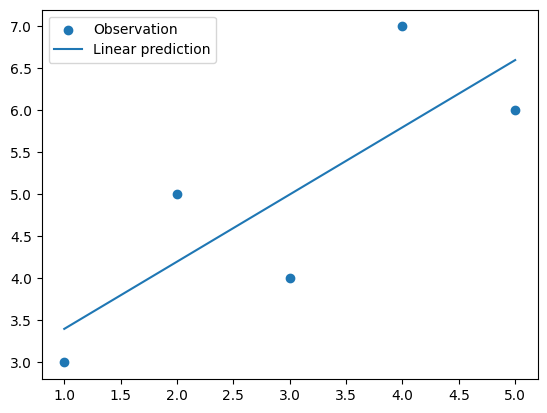

In [154]:
print("2. The linear regression plot")
plt.scatter(X, y, label='Observation')
plt.plot(X, lin_reg.predict(X_reg), label='Linear prediction')
plt.legend()
plt.show()

In [155]:
residuals = y - lin_reg.predict(X_reg)
print("3. Residuals: ", residuals)

3. Residuals:  [-0.4  0.8 -1.   1.2 -0.6]


In [156]:
print("4. SSR:", end=" ")
print(sum(map(lambda x: x*x, residuals)))

4. SSR: 3.5999999999999996


In [157]:
print("5. R_squared score:", end=" ")
print(lin_reg.score(X_reg, y))

5. R_squared score: 0.64


## Part 4. Coding task: Regression to the California Housing dataset. 

The goal of this task is to predict house prices based on median income using a linear regression model.

### **Tasks:**
1) Divide the dataset into training and testing sets.
2) Fit a linear regression model using the training data.
3) Make predictions on the test data
4) Evaluate the model’s performance using appropriate metrics, such as Mean Squared Error (MSE) and R² score.
5) Plot the regression line on a scatter plot of the actual data to visually assess the model’s fit.
6) Plot the residuals distribution
7) Repeat those steps by using more features

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### 1. Train test split

In [159]:
X = np.array(df['MedInc']).reshape(-1, 1)
y = data.target

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train data:', X_train.shape, '\nTest data: ', X_test.shape)

Train data: (16512, 1) 
Test data:  (4128, 1)


### 2. Fitting a linear model

In [161]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print('R_squared =', linear_regression.score(X_train, y_train))

R_squared = 0.47699273458205227


### 3. Prediction on test data

In [162]:
y_pred = linear_regression.predict(X_test)
y_pred

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956], shape=(4128,))

### 4. Evaluation metrics

In [163]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2_score:', r2_score(y_test, y_pred)) 

MSE: 0.7091157771765548
R2_score: 0.45885918903846656


The $R^2$ score is not that good. A good is score should be as close to 1 as possible.

### 5. Plot

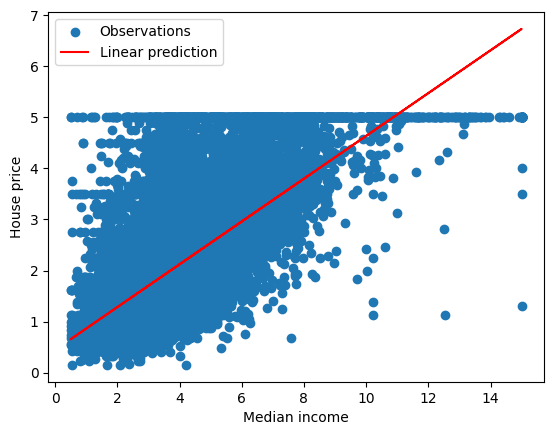

In [164]:
plt.scatter(X, y, label='Observations')
plt.xlabel('Median income')
plt.ylabel('House price')
plt.plot(X, linear_regression.predict(X), label='Linear prediction', color='red')
plt.legend()
plt.show()

### 6. Residuals' distribution - residual plot and box plot

In [165]:
house_price_residuals = y - linear_regression.predict(X)
house_price_residuals

array([ 0.59032588, -0.34069387,  0.03309552, ..., -0.23447273,
       -0.38058613, -0.55222922], shape=(20640,))

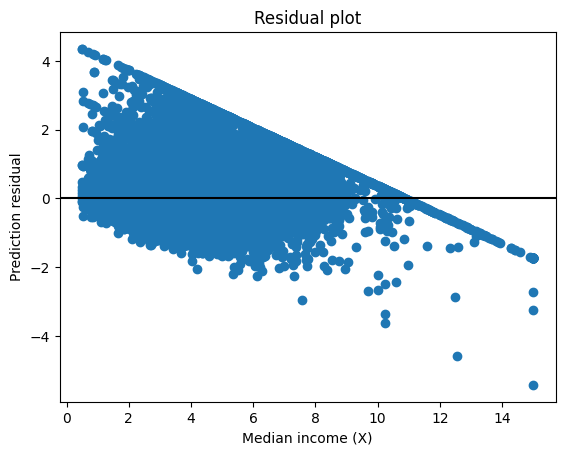

In [166]:
plt.scatter(X, house_price_residuals)
plt.title('Residual plot')
plt.xlabel('Median income (X)')
plt.ylabel('Prediction residual')
plt.axhline(y = 0, color = 'black')
plt.show()

We can see that this plot is skewed, meaning that there is some bias and adding complexity to this model might help us improve the predictions

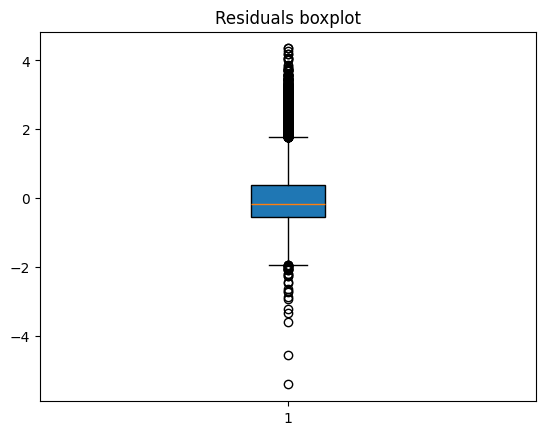

In [167]:
plt.boxplot(house_price_residuals, patch_artist=True)
plt.title('Residuals boxplot')
plt.show()

Boxplot also suggests that there are **significant outliers** in the residuals => big error of prediction

### 7. Use more features

In [168]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [169]:
X = np.array(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']])
y = data.target

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train data:', X_train.shape, '\nTest data: ', X_test.shape)

Train data: (16512, 8) 
Test data:  (4128, 8)


In [171]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print('R_squared =', linear_regression.score(X_train, y_train))

R_squared = 0.6125511913966952


In [172]:
y_pred = linear_regression.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2_score:', r2_score(y_test, y_pred)) 

MSE: 0.555891598695242
R2_score: 0.5757877060324526


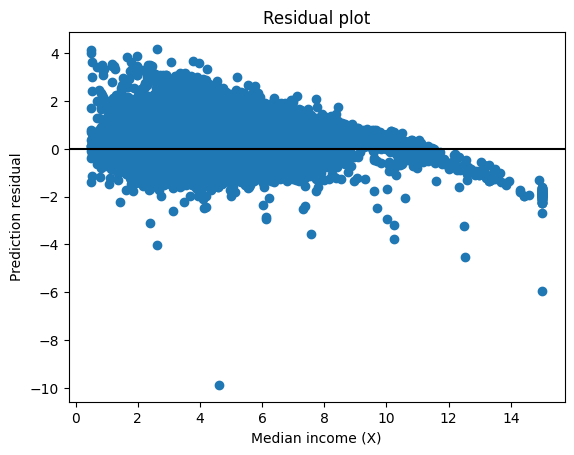

In [173]:
house_price_residuals = y - linear_regression.predict(X)

plt.scatter(X[:, 0], house_price_residuals)
plt.title('Residual plot')
plt.xlabel('Median income (X)')
plt.ylabel('Prediction residual')
plt.axhline(y = 0, color = 'black')
plt.show()

After tuning the columns list for a bit, I came to a conclusion that using all features gives us the best result in terms of $R^2 = 0.61$ for test and $R^2 = 0.58$ 